In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/salary_data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


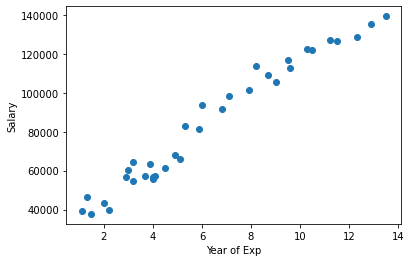

In [4]:
plt.scatter( data['YearsExperience'] ,data['Salary'] )
plt.xlabel('Year of Exp')
plt.ylabel('Salary')
plt.show()

In [5]:
X = data.drop('Salary',axis=1)
y = data['Salary']

X_train , X_test , Y_train , Y_test = train_test_split(X,y,random_state=101,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((28, 1), (7, 1), (28,), (7,))

In [6]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [7]:
pred = lr.predict(X_test)
pred

array([ 80430.70927962,  56616.04598277,  88368.93037856, 147464.57633739,
       127178.01130675, 112183.5936754 , 107773.47084266])

In [8]:
diff = Y_test - pred

pd.DataFrame(np.c_[Y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,81363.0,80430.709280,932.290720
1,54445.0,56616.045983,-2171.045983
2,91738.0,88368.930379,3369.069621
3,139465.0,147464.576337,-7999.576337
4,127345.0,127178.011307,166.988693
5,116969.0,112183.593675,4785.406325
6,105582.0,107773.470843,-2191.470843


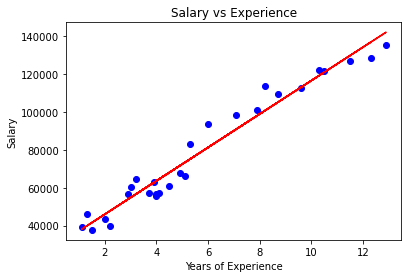

In [9]:
plt.scatter(X_train , Y_train , color='blue')
plt.plot(X_train ,lr.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

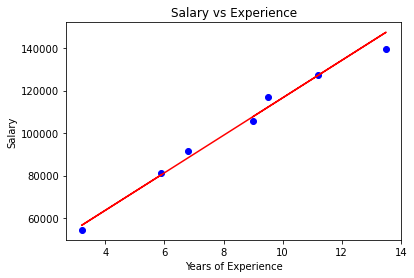

In [10]:
plt.scatter(X_test , Y_test,color='blue')
plt.plot(X_test ,lr.predict(X_test) ,color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [11]:
lr.score(X_test , Y_test)

0.9785870620257094

In [12]:
rmse = np.sqrt(mean_squared_error(Y_test,pred))
r2 = r2_score(Y_test,pred)
rmse , r2

(3939.851369710113, 0.9785870620257094)

In [18]:
exp = 3
lr.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])} thousands")

Salary of 3 year experience employee = 54851 thousands


In [19]:
exp = 5
lr.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])} thousands")

Salary of 5 year experience employee = 72492 thousands


In [20]:
from joblib import dump
dump(lr, '../model/model_1.joblib')

['../model/model_1.joblib']